In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

# 2018-11798 박정훈

# Problem 1

In [2]:
# (a) using the composite trapezoidal rule
def f(x): # 적분할 함수 정의
    return np.sin(x**4) 

x=0
h=0.00005 # 한 step 의 크기
I=0 
while (x<(4-h)): # x의 범위 지정
    I+=f(x)+f(x+h) # composite trapezoidal rule
    x+=h # x 값 이동

I*h*0.5

0.34703207263641306

In [3]:
# (b) usnig the composite Simpson's rule

x=0
h=0.001
I=0
while(x<(4-4*h)): # composite Simpson's rule 에 맞는 범위 설정
    I+=4*f(x+h)+2*f(x+2*h) # composite trapezoidal rule
    x+=2*h
    if(x>(4-3*h)): # 마지막 step 에 대해서
        I+=4*f(x+h)

(I+f(0)+f(4))*h/3

0.3470320793346333

In [4]:
# (c) using the Gaussian quadrature
def f(x):
    return np.sin(x**4)
a=0
b=4
def GQ(n):
    x,w=np.polynomial.legendre.leggauss(n)
    gauss=0
    for i in range(0,n):
        gauss+=w[i]*f(((b+a)+x[i]*(b-a))*0.5) # 가중치를 계산한 legendre polynomial 의 0 점에서의 함숫값을 이용
              
    return gauss*(b-a)*0.5

In [5]:
GQ(200)

0.3470320747563967

# Problem (2)

In [6]:
def f(u,x): # 적분 기호 안의 함수
    if(x==0): # 0으로 갈 때 극한값이 3u 이기 때문에 구간을 나눴음 / 분모에 0이 갈 수 없기 때문
        return 3*u
    else: # 그 외의 경우는 함숫 값을 반환하도록 함
        return x*np.arctan(u*np.tan(x))/(1-x/np.tan(x))

In [7]:
def Simpson(u,n): # composite Simpson's rule 을 이용한 적분
    x=0
    I=0
    p=np.pi*0.5 # 구간의 끝
    h=np.pi*0.5/n # step 의 크기
    while (x<=(p-4*h)):
        I+=4*f(u,x+h)+2*f(u,x+2*h)
        x+=2*h
        if(x>(p-3*h)):
            I+=f(u,x+h)
    return (I+f(u,0)+f(u,p))*h/3

In [8]:
def H(u,n): # H(u) 를 구현
    return 1/(1+u)*np.exp(1/np.pi*Simpson(u,n))

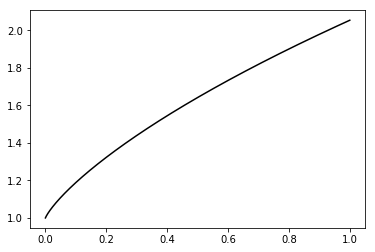

In [9]:
t=np.arange(0,1,0.001)
plt.plot(t,H(t,10000),'k') # 각 적분을 '구간을 10000 등분 하여' 수행한 결과 값

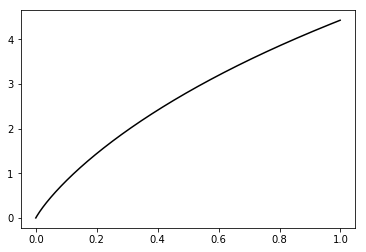

In [10]:
t=np.arange(0,1,0.001)
plt.plot(t,Simpson(t,1000),'k') # 각 적분을 '구간을 1000 등분 하여' 수행한 결과 값

# Problem 3

In [11]:
# (a) interpolating linearly the data
x=[-2.1,-1.45,-1.3,-0.2,0.1,0.15,0.8,1.1,1.5,2.8,3.8]
y=[0.012155,0.122151,0.184520,0.960789,0.990050,0.977751,0.527292,0.298197,0.105399,3.936690*10**-4,5.355348*10**-7]
def lin(a): 
    i=0
    while(a>=x[i]): # a가 x[i]  보다 클 때 까지 index 를 찾음
        i+=1
    return y[i-1]+(y[i]-y[i-1])/(x[i]-x[i-1])*(a-x[i-1]) # linear interpolate
    

In [12]:
print(lin(3.2)) # x=3.2 에서의 예상되는 값
print(lin(0.4)) # x=0.4 에서 ~
print(lin(-0.128)) # x=-0.128 에서 ~
print(lin(-2)) # x=-2 에서

0.00023641561391999987
0.8044975384615385
0.96781164
0.02907746153846155


In [13]:
# (b) interpolating using 10-th order polynomials
p=np.polyfit(x,y,10) # 10차 다항식으로 근사
poly=np.poly1d(p)
print(poly(3.2)) # x=3.2 에서의 예상 값
print(poly(0.4))
print(poly(-0.128))
print(poly(-2))

1.0971847795998644
0.8525647942462673
0.983892518001133
-0.047536863737138946


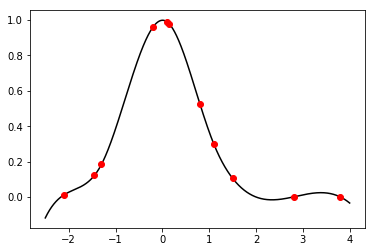

In [14]:
# (c) interpolating using cubic splines
from scipy import interpolate
result=interpolate.CubicSpline(x,y,bc_type='not-a-knot')

t=np.arange(-2.5,4.0,0.001)
plt.plot(t,result(t),'k') # plot
plt.plot(x,y,'ro')

# Problem 4

In [15]:
fn ='BlackHall.txt'
m,merr,v,verr=np.loadtxt(fn,unpack=True,usecols=[0,1,2,3])
logm=[]
logv=[]
logmerr=[]
logverr=[]
for i in range(0,67):
    logm.append(np.log10(m[i])) # log m
    logv.append(np.log10(v[i])) # log v (sigma)
    logmerr.append(merr[i]/m[i]/np.log(10)) # log merr
    logverr.append(verr[i]/v[i]/np.log(10)) # log verr

In [16]:
# (a)
def lin_func(p,x):
    return p[0]+p[1]*x

lin_model=Model(lin_func)

data=RealData(logv,logm)

odr=ODR(data,lin_model,beta0=[0.,1.0])

out=odr.run()
out.pprint()
out.beta
out.sd_beta
out.sum_square

print(out.beta[0], out.beta[1]) # a 값과 b 값 출력
print(out.sd_beta[0], out.sd_beta[1]) # a 값의 error 와 b 값의 error 출력

Beta: [-3.95085214  5.36449513]
Beta Std Error: [1.189307   0.53193129]
Beta Covariance: [[105.91316862 -47.27139176]
 [-47.27139176  21.18717664]]
Residual Variance: 0.013354818479491772
Inverse Condition #: 0.002781196346207664
Reason(s) for Halting:
  Sum of squares convergence
-3.9508521392409395 5.364495134829999
1.1893070005060484 0.5319312907299126


In [17]:
# (b)
def lin_func(p,x):
    return p[0]+p[1]*x

lin_model=Model(lin_func)

data=RealData(logv,logm,sx=logverr,sy=logmerr)

odr=ODR(data,lin_model,beta0=[0.,1.0])

out=odr.run()
out.pprint()
out.beta
out.sd_beta
out.sum_square

print(out.beta[0], out.beta[1]) # a 값과 b 값 출력
print(out.sd_beta[0], out.sd_beta[1]) # a 값의 error 와 b 값의 error 출력

Beta: [-2.33972617  4.70367147]
Beta Std Error: [0.98627017 0.45017167]
Beta Covariance: [[ 0.04820321 -0.02193871]
 [-0.02193871  0.01004247]]
Residual Variance: 20.179753150369265
Inverse Condition #: 0.0033146515946676173
Reason(s) for Halting:
  Sum of squares convergence
-2.339726173867876 4.703671471807549
0.9862701736081938 0.4501716711932508


(1.5, 3)

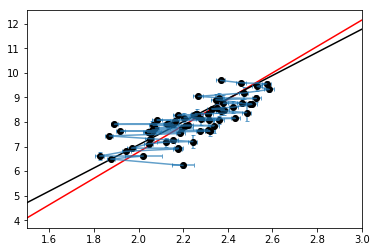

In [18]:
# (c)
t=np.arange(1.5,3,0.001)
plt.plot(t,-3.95085214+5.36449513*t,'r') # error 무시한 fitting
plt.plot(t,-2.33972617+4.70367147*t,'k') # error 고려한 fitting
plt.errorbar(logv,logm,xerr=logverr,yerr=logmerr,alpha=0.7,capsize=2) # errorbar
plt.plot(logv,logm,'ko') # plot data point
plt.xlim(1.5,3)

In [19]:
# (d)
def lin_func(p,x):
    return p[0]+p[1]*x

lin_model=Model(lin_func)

data=RealData(logm,logv,sx=logmerr,sy=logverr)

odr=ODR(data,lin_model,beta0=[0.,1.0])

out=odr.run()
out.pprint()
out.beta
out.sd_beta
out.sum_square

print(out.beta[0], out.beta[1]) # c 값과 d 값 출력
print(out.sd_beta[0], out.sd_beta[1]) # c 값의 error 와 d 값의 error 출력

Beta: [0.49738684 0.2126048 ]
Beta Std Error: [0.16225368 0.02034758]
Beta Covariance: [[ 1.30458770e-03 -1.62818794e-04]
 [-1.62818794e-04  2.05167926e-05]]
Residual Variance: 20.179753136996137
Inverse Condition #: 0.0012127783467175601
Reason(s) for Halting:
  Sum of squares convergence
0.49738684014874684 0.21260479751927525
0.16225368353893027 0.020347575026708666


#### logM=a+blogv <=> logv=(-a/b)+(1/b)logM 이므로 c=-a/b 이고 d=1/b 이어야 한다. 실제로 값을 대입해서 계산해보면 예측되는 c = (-2.33972617)/4.70367147 = 0.497 이고, logm , log  v 로 fitting 한 결과 값과 일치함을 확인할 수 있다.

#### 또한 예측되는 d = 1/4.70367147 = 0.2126 으로, 실제로 fitting 한 결과 값인 0.2126 과 같음을 확인할 수 있다.

# Problem 5

In [20]:
# (a)
fn='hw3p5.dat'
x,y=np.loadtxt(fn,unpack=True,usecols=[0,1])

In [21]:
def gauss_func(p,x): # gauss function
    xc=x-p[2]
    sig2=p[3]**2
    return p[0]+p[1]*np.exp(-0.5*xc**2/sig2)

model=Model(gauss_func)

data=RealData(x,y)

odr=ODR(data,model,beta0=[0,-10,10,3]) # guessing initial value
out=odr.run()
out.pprint()
print("chi square : {}".format(out.sum_square))

Beta: [2.2459671  1.21002556 9.85323613 3.26831463]
Beta Std Error: [0.03225696 0.04023563 0.10167473 0.15084068]
Beta Covariance: [[ 2.65108338e-02 -2.05546476e-02  3.25071205e-05 -9.17732835e-02]
 [-2.05546476e-02  4.12475473e-02  6.12187167e-03  2.47641414e-02]
 [ 3.25071205e-05  6.12187167e-03  2.63392035e-01 -1.94035544e-02]
 [-9.17732835e-02  2.47641414e-02 -1.94035544e-02  5.79713691e-01]]
Residual Variance: 0.03924853139162934
Inverse Condition #: 0.025682681307379933
Reason(s) for Halting:
  Sum of squares convergence
chi square : 7.692712152759351


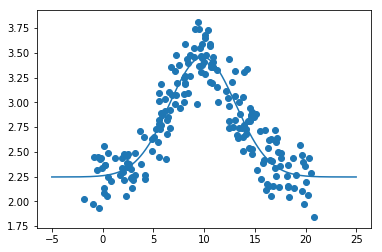

In [22]:
plt.scatter(x,y)
t=np.arange(-5,25,0.01)
plt.plot(t,out.beta[0]+out.beta[1]*np.exp(-0.5*(t-out.beta[2])**2/(out.beta[3]**2)))

In [23]:
# (b)
def Lorentz_func(p,x): # Lorentz function
    xc=x-p[3]
    return p[0]+p[1]/(p[2]+xc**2)

model=Model(Lorentz_func)

data=RealData(x,y)

odr=ODR(data,model,beta0=[2,100,10,10]) # guessing initial value
out=odr.run()
out.pprint()
out.sum_square
print("chi square : {}".format(out.sum_square))

Beta: [ 1.98483327 28.60658162 19.05777467  9.8159789 ]
Beta Std Error: [0.05842335 4.7672396  2.74738769 0.10289001]
Beta Covariance: [[ 8.68751083e-02 -6.64901132e+00 -3.55654573e+00 -2.23459157e-03]
 [-6.64901132e+00  5.78437442e+02  3.26805925e+02  1.17689627e-02]
 [-3.55654573e+00  3.26805925e+02  1.92115468e+02 -8.16363075e-02]
 [-2.23459157e-03  1.17689627e-02 -8.16363075e-02  2.69444226e-01]]
Residual Variance: 0.03928959599097544
Inverse Condition #: 0.014724065884690813
Reason(s) for Halting:
  Sum of squares convergence
chi square : 7.700760814231185


#### (c) gauss function 의 chi square 값이 lorentz function 의 chi square 값이 조금 작다. 따라서 gaussian fitting 이 더 낫다고 할 수 있다.

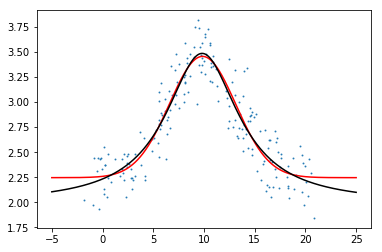

In [24]:
t=np.arange(-5,25,0.001)
gauss=[2.2459671,  1.21002556, 9.85323613, 3.26831463]
lorentz=[1.98483327, 28.60658162, 19.05777467,  9.8159789]
plt.scatter(x,y,alpha=0.9,s=0.9)
plt.plot(t,gauss[0]+gauss[1]*np.exp(-0.5*(t-gauss[2])**2/(gauss[3]**2)),'r') # gauss fitting
plt.plot(t,lorentz[0]+lorentz[1]/(lorentz[2]+(t-lorentz[3])**2),'k') # Lorentz fitting

# 빨간색 Gaussian fitting
# 검은색 lorentzian fitting